# **Pandas Tutorial**

This tutorial uses SQL as a way to teach Pandas commom operations. Do skim through this [Pandas official SQL comparision](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html) and this [medium post](https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e) before starting this tutorial.

---

In [ ]:
# Importing the pandas package
import pandas as pd
import numpy as np

# Loading the datasets as Pandas Dataframe
airports = pd.read_csv('https://ourairports.com/data/airports.csv')
airport_freq = pd.read_csv('https://ourairports.com/data/airport-frequencies.csv')
runways = pd.read_csv('https://ourairports.com/data/runways.csv')

###**Selecting columns**
We will learn of how to **select columns of a dataframe**. Refer [this article](https://www.geeksforgeeks.org/how-to-select-multiple-columns-in-a-pandas-dataframe/) for more details.

iloc and loc can get very confusing sometimes. In simple fashion, loc is label based and iloc is index based. Refer [this analytics vidhya article](https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/) for details.

In [ ]:
# SELECT * FROM airports
airports

# SELECT * FROM airports limit 3
temp = airports.head(3)
print(temp)

temp = airports.loc[0:2,:] # 3 rows (0,1,2) and all columns
print(temp)

temp = airports.iloc[0:3,:] # Notice the 3 is the range for rows, in iloc last parameter to range is not inclusive
print(temp)

# SELECT ident, type, name FROM airport 
temp = airports[['ident', 'type', 'name']]
print(temp)

temp = airports[airports.columns[1:4]] # airports.column is an attribute of type index and hence can be used directly
print(temp)

temp = airports.loc[:, ['ident', 'type', 'name']]
temp = airports.loc[:, 'ident':'name'] # taking in the range of columns from ident to name
print (temp)

temp = airports.iloc[:, 1:4] # using iloc, first value is inclusive and last exclusive (hence started with 1 and ended with 4 to take in 3 columns)
temp = airports.iloc[:, [1,2,3]] # To exemplify, 1:4 is same as passing in an array of 1, 2, 3
print (temp)

# SELECT type FROM airport limit 6
temp = airports['type'].head(6)
temp = airports.type.head(6)
print(temp)

# SELECT ident, type, name FROM airport limit 3
temp = airports[0:3][['ident', 'type', 'name']]
temp = airports.loc[0:2, ['ident', 'type', 'name']]
temp = airports.iloc[0:3, 1:4]
print(temp)


### **Filtering and sorting**

**Filtering and sorting rows** of a dataframe. Do remember that string matching taking in a regex value. Refer to [this article](https://stackoverflow.com/questions/22291565/pandas-text-matching-like-sqls-like) for more details.

In [ ]:
# Filter out all rows with missing values
airports.dropna()
        
# Filter out all columns with missing value
airports.dropna(axis=1)

# SELECT * FROM airports WHERE iso_region is not null
airports[airports.iso_region.notna()]

# SELECT ident, name, municipality FROM airports WHERE iso_region = 'US-CA' and type = 'large_airport'
temp = airports[(airports.iso_region == 'US-CA') & (airports.type == 'large_airport')] [['ident', 'name', 'municipality']] # using default dataframe filters
temp = airports.loc[(airports.iso_region == 'US-CA') & (airports.type == 'large_airport'), ['ident', 'name', 'municipality']] # using loc
temp = airports.iloc[ ((airports.iso_region == 'US-CA') & (airports.type == 'large_airport')).values, [1,3,10]] #iloc doesn't take in a boolean series, hence with .values we create is as a numpy array
print(temp)

# SELECT ident, name, municipality FROM airports WHERE iso_region = 'US-CA' and type = 'large_airport' ORDER BY name DESC, municipality 
temp = airports[(airports.iso_region == 'US-CA') & (airports.type == 'large_airport')] [['ident', 'name', 'municipality']]
temp = temp.sort_values(['name', 'municipality'], ascending= [False, True])
print(temp)

# SELECT * FROM airports WHERE type not in ('heliport', 'balloonport')
airports[~airports.type.isin(['heliport', 'balloonport'])]

# SELECT * FROM airports WHERE type in ('heliport', 'balloonport')
airports[airports.type.isin(['heliport', 'balloonport'])]

# SELECT ident, type, name FROM airports WHERE type like '%airport%' and (iso_region = 'US-AZ' OR iso_region = 'CN-21')
airports[(airports.type.str.contains('.*airport.*'))& ((airports.iso_region == 'US-AZ')|(airports.iso_region == 'CN-21'))] [['ident', 'type', 'name']] # Contains takes in regex
airports.loc[(airports.type.str.contains('.*airport.*'))& ((airports.iso_region == 'US-AZ')|(airports.iso_region == 'CN-21')), ['ident', 'type', 'name']] 
airports.iloc[((airports.type.str.contains('.*airport.*'))& ((airports.iso_region == 'US-AZ')|(airports.iso_region == 'CN-21'))).values, 1:4] 
airports.query('type.str.contains(".*airport.*") and iso_region == "US-AZ" or iso_region == "CN-12" ', inplace = False, engine='python')[['ident', 'type', 'name']] # DONT USE QUERY with python engine - gets slow on big data. Also its confusing to use 'and' and 'or' togeher here.

idx = np.where(airports.type.str.contains('.*airport.*') & ((airports.iso_region == 'US-AZ')|(airports.iso_region == 'CN-21'))) # np.where returns the list of indexes that match criteria which is passed into the loc function
airports.loc[idx][['ident', 'type', 'name']]

### **Data aggregation**

Group by will return a pivot table kind of dataframe upon execution, to get a SQL style dataframe where the aggregations are new columns to the dataframe, we would need do to do step. Refer [this answer](https://stackoverflow.com/questions/53781634/aggregation-in-pandas) for very good insights into group by.
1.   [Unstack the pivot](https://stackoverflow.com/questions/41658498/in-pandas-after-groupby-the-grouped-column-is-gone) by passing in as_index = False into the groupby function
2.   Merge the multiple layered columns of the data (called indexes)

For SQL partition by clause, pandas provides the rank method. A good reference guide is [here](https://dfrieds.com/data-analysis/rank-method-python-pandas.html).



In [ ]:
# SELECT count(*), avg(lenght_ft), max(length_ft), median(width_ft) FROM runways
temp = runways.agg({'length_ft': [min, max], 'width_ft': max})
print(temp)

# SELECT surface, lighted, count(*), avg(lenght_ft), max(length_ft), median(width_ft) FROM runways GROUP BY surface, lighted
temp = runways.groupby(['surface', 'lighted'], as_index= False).agg({'length_ft': [np.size, np.mean, np.max], 'width_ft': np.max})
temp.columns = pd.Index([e[0] + e[1] for e in temp.columns.tolist()]) # Need to update the columns else it returns a pivot table style output (wide to long maybe another option - reshape)
temp
print(temp)

# PREFERRED way of doing the same above SQL style query.
temp = runways.groupby(['surface', 'lighted']).agg(length_ft_cnt = ('length_ft', 'size'), 
                                                   length_ft_mean = ('length_ft', 'mean'), 
                                                   length_ft_max = ('length_ft', 'max'), 
                                                   width_ft_max = ('width_ft', 'max')
                                                  ).reset_index()
temp.head()

You can also write your own custom functions for manupulating aggregations, a good reference is [here](https://stackoverflow.com/questions/44348426/pandas-groupby-custom-function-to-each-series). 

Doing **SQL sytle window functions** include: ROW_NUMBER(), RANK(), DENSE_RANK() and NTILE(). Refer to [this article](https://dfrieds.com/data-analysis/rank-method-python-pandas.html) for more details. 

In [ ]:
# create a sample dataframe
data = pd.DataFrame({
    'age' :     [ 10, 22, 13, 21, 12, 11, 17, 11],
    'section' : [ 'A', 'B', 'C', 'B', 'B', 'A', 'A', 'B'],
    'city' :    [ 'Delhi', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi'],
    'gender' :  [ 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M'],
    'favourite_color' : [ 'red', np.NAN, 'yellow', np.NAN, 'black', 'green', 'red', 'red']
})
data

# create a sample dataframe
def mean_gap(a):
  """Returns a float
  if a = [1,3,7] mean_gap(a) will give me (abs(3-1) + abs(7-3))/2 = 3.0"""

    b = []
    a = np.asarray(a) # important to convert series to numpy array
    a = np.sort(a)    # sorting maybe necessary for computations that require a specfic ordering of values to get right results
    for i in range(0, len(a)-1):
        b.append(abs(a[i+1]-a[i]))
    return np.mean(b) 

temp = data.groupby(['city', 'gender']).agg(avg_age = ('age', 'mean'),
                                            gap_age = ('age', mean_gap)).reset_index() # used a custom function
print(temp)
data.sort_values(['city', 'gender', 'age'])

# ROW_NUMBER()
data['age_rank'] = data.groupby(['section', 'city'])['age'].rank(method = 'first')
data['age_rank'] = data.groupby(['city', 'gender'])['age'].rank(method = 'first', ascending = False)
data.sort_values(['city','gender', 'age'])

# RANK()
data['age_rank'] = data.groupby(['city', 'gender'])['age'].rank(method = 'min', ascending = False)
data.sort_values(['city','gender', 'age'])

# DENSE_RANK()
data['age_rank'] = data.groupby(['city', 'gender'])['age'].rank(method = 'dense', ascending = False)
data.sort_values(['city','gender', 'age'])

# NTILE()
data.groupby(['city', 'gender'])['age'].rank(pct = True, ascending = False)*100
data['age_ntile_city_gender'] = data.groupby(['city', 'gender'])['age'].rank(pct = True, ascending = False)*100 # See how the percentiles are reversed due to ascending
data.sort_values(['city','gender', 'age'])

data['age_percentile'] = data['age'].rank(pct = True)*100
print(data.sort_values('age'))

data.age.quantile(.5) # Get quantile of a specific column

### **JOINs and UNIONs** 

In [ ]:
airports.head()
print(airports.columns)
airport_freq.head()

airport_freq.merge(airports[['id']], left_on='airport_ref', right_on='id', how='inner')[['airport_ident', 'type', 'description', 'frequency_mhz']]

data_new = pd.DataFrame({
    'city' :    [ 'Delhi'],
    'location': [ 'North']
})

# DOING JOINS
data_new.merge(data, left_on='city', right_on='city', how = 'outer') # Full outer join
data_new.merge(data, left_on='city', right_on='city', how = 'inner') # Inner join
data_new.merge(data, left_on='city', right_on='city', how = 'left') # Left join
data_new.merge(data, left_on='city', right_on='city', how = 'right') # Right join


# DOING UNIONS
data1 = pd.DataFrame({
    'age' :     [ 10, 22, 13, 21, 12, 11, 17, 11],
    'city' :    [ 'Delhi', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi'],
})

data2 = pd.DataFrame({
    'age' :     [ 10, 22, 13, 18, 2, 11],
    'city' :    [ 'Delhi', 'Delhi', 'Mumbai', 'Delhi', 'Mumbai', 'Delhi'],
})

# UNION ALL
pd.concat([airports[airports.ident == 'KLAX'][['name', 'municipality']], airports[airports.ident == 'KLGB'][['name', 'municipality']]])
pd.concat([data1, data2]) # Pass in a list

# UNION
pd.concat([data1, data2]).drop_duplicates() 

### **Creating new columns**
Applying **custom functions** to rows and columns and creating new columns

In [ ]:
# Using a simple ifelse logic to create flag columns
runways['Wide_runway'] = np.where(runways['width_ft']>=100, 'yes', 'no')

# Apply a custom function to every row in a pandas dataframe
# 1 meter = 3.28 foot
# Doing without any custom function 
runways['length_mtr'] = runways['length_ft'] / 3.28
runways['area_mtr'] = (runways['length_ft'] / 3.28) * (runways['width_ft'] / 3.28)

# Using .apply and custom functions
def feet_to_meter(value):
  return value / 3.28
runways['length_mtr'] = runways['length_ft'].apply(feet_to_meter)

def calculate_area(row):
    length = feet_to_meter(row['length_ft'])
    width  = feet_to_meter(row['width_ft'])
    return length * width

runways['area_mtr'] = runways.apply(calculate_area, axis = 1)

# Using .apply and customizing a function even more
def calculate_area1(row):
    length = feet_to_meter(row['length_ft'])
    width  = feet_to_meter(row['width_ft'])
    if (row['surface'] == 'ASPH-G') | (row['surface'] == 'GRASS'):
      length = 0
    return length * width

runways['area_mtr'] = runways.apply(calculate_area1, axis = 1)

runways

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft,length_mtr,area_mtr,Wide_runway
0,12,12,12,12.0,12.0,hoot,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.658537,13.384890,yes
1,255155,6524,00AK,2500.0,70.0,hoot,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,762.195122,16266.359310,yes
2,254165,6525,00AL,2300.0,200.0,hoot,0,0,01,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,701.219512,42757.287329,yes
3,270932,6526,00AR,40.0,40.0,hoot,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN,12.195122,148.720999,yes
4,322128,322127,00AS,1450.0,60.0,hoot,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,442.073171,8086.704343,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,327703,327451,ZYSQ,8202.0,148.0,NaN,0,0,04,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,2500.609756,112832.391434,yes
41529,235188,27242,ZYTL,10827.0,148.0,CON,1,0,10,38.9671,121.520,105.0,95.6,650.0,28,38.9642,121.558,85.0,275.6,320.0,3300.914634,148943.709102,yes
41530,235186,27243,ZYTX,10499.0,148.0,CON,1,0,06,41.6304,123.469,171.0,48.7,NaN,24,41.6493,123.498,197.0,228.7,NaN,3200.914634,144431.513980,yes
41531,235169,27244,ZYYJ,8530.0,148.0,CON,1,0,09,42.8811,129.436,623.0,81.7,NaN,27,42.8845,129.467,597.0,261.7,NaN,2600.609756,117344.586556,yes


### **Iterating through the dataframe** 
[This article](https://thispointer.com/pandas-6-different-ways-to-iterate-over-rows-in-a-dataframe-update-while-iterating-row-by-row/) shows various ways to use for loop on a dataframe. This will be very slow. This should be the last resort if custom functions in the split-apply-combine strategy is too hard to implement and this is a one time thing.

In [ ]:
# Loop through rows of dataframe by index i.e. from 0 to number of rows
temp = runways.head()
for i in range(0, temp.shape[0]):
  rowSeries = temp.iloc[i] # get row contents as series using iloc{] and index position of row
  print(rowSeries.values) # print row contents
  temp['surface'].iloc[i] = 'hoot' # update the cell value in temp dataframe

temp.head()

## Using the pycaret package for machine learning 
An easy to follow example is also [present here](https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression).

In [ ]:
#!pip install pycaret

try:
  import pycaret
except ImportError as e:
  print("Module doesn't exist")

from pycaret.utils import enable_colab
enable_colab()

help(enable_colab)

import pycaret.datasets as pydat
df = pydat.get_data('credit')
df.shape

train = df.sample(frac=0.95, random_state=4356)
type(train)




In [ ]:
train = train.reset_index(drop=True)
test = df.drop(train.index).reset_index(drop = True)

print('Data for Modeling: ' + str(train.shape))
print('Unseen Data For Predictions: ' + str(test.shape))

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default
0     250000    1          1         2  ...  100566.0       0.0       0.0        0
1     180000    2          3         1  ...    2000.0    2000.0    1424.0        0
2      80000    2          3         1  ...    1737.0    1760.0    1882.0        0
3     210000    1          2         2  ...    3100.0       0.0    2003.0        0
4      50000    2          2         1  ...       0.0       0.0       0.0        1

[5 rows x 24 columns]
Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [ ]:
import pycaret.classification as cls
experiment_1 = cls.setup(data = train, target = 'default', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
cls.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.820800,0.774100,0.349800,0.686800,0.463000,0.369000
1,Ridge Classifier,0.820700,0.000000,0.349800,0.686000,0.462700,0.368700
2,Linear Discriminant Analysis,0.820700,0.762500,0.363100,0.676700,0.471900,0.375800
3,Gradient Boosting Classifier,0.820100,0.773000,0.355400,0.678900,0.466000,0.370500
4,CatBoost Classifier,0.818900,0.771100,0.366200,0.664700,0.472000,0.373600
5,Light Gradient Boosting Machine,0.818300,0.770000,0.358800,0.666000,0.466000,0.368400
6,Ada Boost Classifier,0.818000,0.766200,0.332800,0.682500,0.446800,0.353100
7,Random Forest Classifier,0.805900,0.719700,0.312100,0.622500,0.415300,0.314100
8,Extra Trees Classifier,0.802900,0.735900,0.366500,0.587200,0.450900,0.338600
9,Quadratic Discriminant Analysis,0.781600,0.733900,0.169400,0.598100,0.223900,0.152600


In [ ]:
egb = cls.create_model('dt')
print(egb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7124,0.6095,0.4249,0.3695,0.3953,0.2078
1,0.7206,0.6107,0.4136,0.3792,0.3957,0.2144
2,0.7231,0.6011,0.3824,0.3760,0.3792,0.2010
3,0.7180,0.6139,0.4278,0.3784,0.4016,0.2181
4,0.7231,0.6102,0.4079,0.3820,0.3945,0.2152
5,0.7337,0.6298,0.4448,0.4067,0.4249,0.2521
6,0.7262,0.6072,0.3938,0.3840,0.3888,0.2124
7,0.7112,0.6004,0.3994,0.3615,0.3795,0.1919
8,0.7112,0.6079,0.4237,0.3686,0.3942,0.2058
9,0.7091,0.5964,0.3909,0.3566,0.3730,0.1841


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


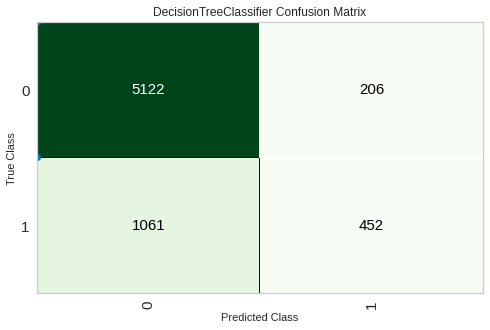

In [ ]:
tuned_egb = cls.tune_model('dt')
cls.plot_model(tuned_egb, plot = 'auc')
cls.plot_model(tuned_egb, plot = 'pr')
cls.plot_model(tuned_egb, plot = 'feature')
cls.plot_model(tuned_egb, plot = 'confusion_matrix')

In [ ]:
cls.evaluate_model(tuned_egb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
cls.predict_model(tuned_egb)
final_egb = cls.finalize_model(tuned_egb)
print(final_egb)
cls.predict_model(final_egb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.8155,0.7336,0.3252,0.6712,0.4381,0.3433


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,PAY_2_0,...,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,180000.0,27.0,81044.0,78403.0,58083.0,58244.0,56041.0,50816.0,2600.0,0.0,4700.0,0.0,2500.0,1092.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7161
1,210000.0,38.0,280.0,0.0,0.0,0.0,0.0,14202.0,0.0,0.0,0.0,0.0,14202.0,2903.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2150
2,500000.0,34.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,13000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1115
3,100000.0,26.0,98542.0,82569.0,87486.0,84536.0,76008.0,69865.0,3326.0,8003.0,2745.0,2689.0,2896.0,2731.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1115
4,210000.0,49.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,582.0,291.0,291.0,291.0,291.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,30000.0,42.0,28658.0,28281.0,29826.0,28572.0,9072.0,0.0,1656.0,3000.0,1000.0,500.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1115
6837,360000.0,27.0,759.0,5695.0,1390.0,8531.0,8531.0,-33.0,5702.0,1395.0,8531.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2150
6838,200000.0,53.0,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7161
6839,80000.0,46.0,40154.0,39021.0,21862.0,222

In [ ]:
test = cls.predict_model(final_egb, data=test)
test.head()

cls.save_model(final_egb,'Final Model 31May2020')
#help(cls.save_model)


Transformation Pipeline and Model Succesfully Saved


In [ ]:
saved_final_egb = cls.load_model('Final Model 31May2020')
new_prediction = cls.predict_model(saved_final_egb, data=test)
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score,Label,Score,Label,Score,Label,Score,Label,Score,Label,Score,Label,Score,Label,Score,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,0,48572.0,45067.0,46492.0,47368.0,7988.0,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115
1,200000,2,1,1,40,2,2,2,2,2,2,80468.0,82874.0,84900.0,85758.0,87003.0,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7161,1,0.7161,1,0.7161,1,0.7161,1,0.7161,1,0.7161,1,0.7161,1,0.7161,1,0.7161
2,50000,2,3,1,44,1,2,3,2,4,3,13112.0,14679.0,15143.0,16892.0,16341.0,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,0,0.4053,0,0.4053,0,0.4053,0,0.4053,0,0.4053,0,0.4053,0,0.4053,0,0.4053,0,0.4053
3,60000,2,2,1,31,2,2,-1,0,0,0,63201.0,56600.0,54952.0,32094.0,31232.0,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.5373,1,0.5373,1,0.5373,1,0.5373,1,0.5373,1,0.5373,1,0.5373,1,0.5373,1,0.5373
4,120000,2,3,2,32,-1,0,0,0,0,0,66551.0,67876.0,69903.0,71446.0,79589.0,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115,0,0.1115
